# Working with the viz_tools module
The purpose of this notebook is to provide an introduction to the viz_tools module. The basic unit of analysis is a 3D calorimeter shower-tensor.  There are 3 main visualization types:  
### 1) ```scatter3d```:   
3D scatter plot of the shower-tensor (with colormap)  
### 2) ```slice_axis_heatmap```:   
Takes a 'slice' of the shower tensor by indexing into specified dimension and plots the selected 2D tensor as a heatmap  
### 3) ```collapse_axis_heatmap```:   
Collapses the specified axis by taking the average. A 2D projection of the 3D tensor, where the projection is the average value.  
### 4) ```hist_by_dim```:   
Collapses the 3D shower-tensor into a 1D histogram. similar to ```collapse_axis_heatmap```, but with two dimensions being averaged.  

##### Please look at the docstrings for more info on each function

### A note about optional arguments
Due to the high skew in the data, the plotting functions possess optional arguments so that the colormaps are not dominated by the few largest values:  
  
#### scaling_factor:   
data is transformed to data**(1/scaling_root) 
#### binary:    
only plots non-zero energy points

##### These options will be displayed in the examples below

In [1]:
# imports
import data_loader
import viz_tools
% matplotlib inline

data = data_loader.load_test_data()  # load sample data for example
ecal = data['ECAL'][:]               # grab the ECAL data
ecal_mu = ecal.mean(axis=0)          # this 3D tensor is the average of the 100 experiments in 
print 'ecal_mu shape:', ecal_mu.shape

Loading data from ../test_data.h5
ecal_mu shape: (24, 24, 25)


/Users/malkini/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


### 1) ```scatter3d```

In [2]:
print viz_tools.scatter3d.__doc__


    3D scatterplot with colormap for energy values
    input:
        array: 3D shower-tensor 
        scaling_root: rescales data=data**1/scaling_root 
        top: keep top% highest energy values
        save: path to save plot
    


/Users/malkini/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


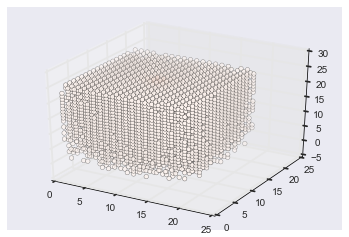

In [3]:
viz_tools.scatter3d(ecal_mu)

#### ```scatter3D``` has the optional ```top``` arg which will only plot the ```top```% highest energy values

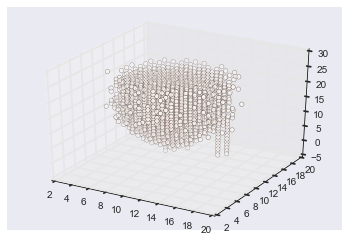

In [4]:
viz_tools.scatter3d(ecal_mu, top=20)

#### Due to the high data skew, the colormap is still not useful even when plotting only the ```top``` 20% of the energy values.  The optional ```scale_root``` arg rescales the data when plotting

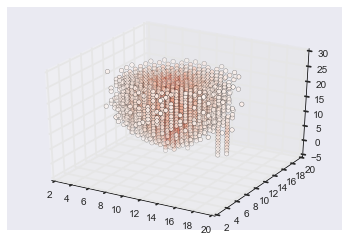

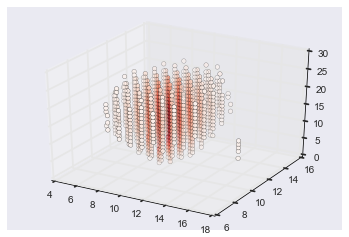

In [5]:
viz_tools.scatter3d(ecal_mu, top=20, scaling_root=20)
viz_tools.scatter3d(ecal_mu, top=10, scaling_root=5)

### 2) ```slice_axis_heatmap```

In [6]:
print viz_tools.slice_axis_heatmap.__doc__


    plots 2D heatmap, slicing along the specified dimension
    if index location are not specified (location==None):
        iteratively plots for all index location
        note: maintains consistent colormap across these  slices
    input:
        array: 3D np.array
        axis: axis to slice through
        location: list for which index slices to plot 
                  if location==None, each index will be plotted iteratively
        scaling_root: rescales data=data**1/scaling_root
        binary: plot binarized version of data [if x>1: x=1]
        save: path to save plot
    


#### Standard usage: plot a 2D heatmap @ index location 14 and 15 of axis 2 (Z-axis)

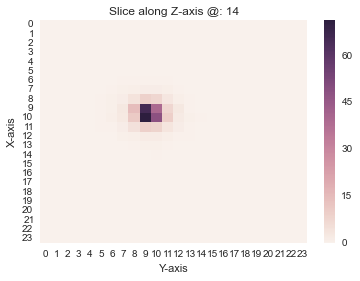

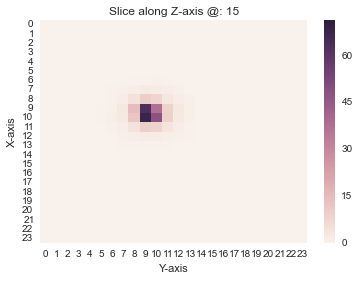

In [7]:
viz_tools.slice_axis_heatmap(ecal_mu,2,location=[14,15]) 

#### Same command, using the ```scaling_root``` arg. Notice the scale change in colormap.

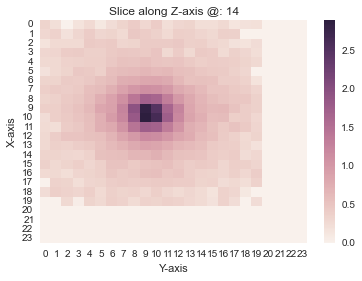

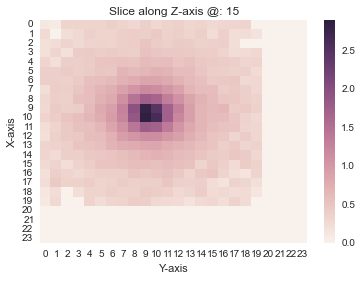

In [8]:
viz_tools.slice_axis_heatmap(ecal_mu,2,location=[14,15], scaling_root=4) 

#### If no ```location``` iterable is passed, plots 'stepping through' the axis are generated

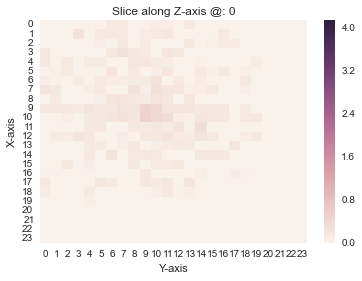

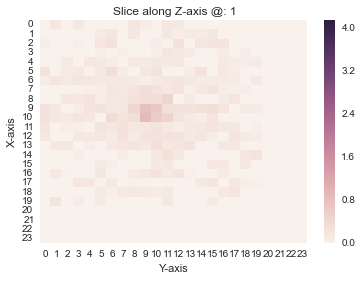

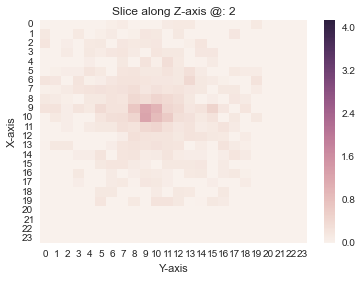

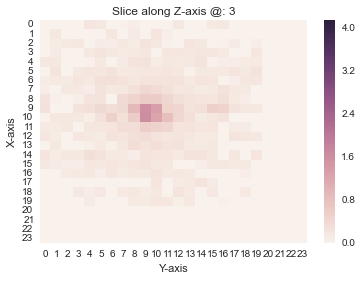

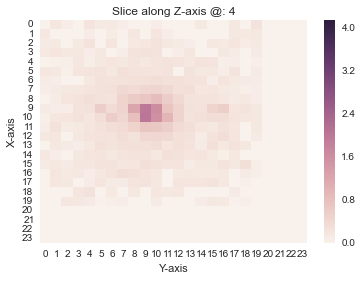

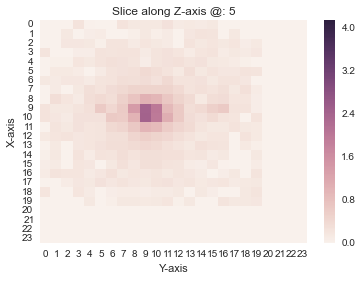

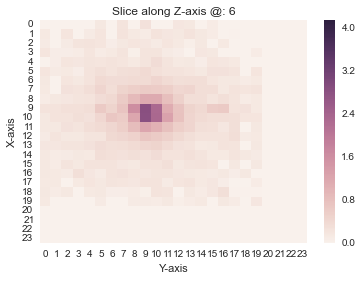

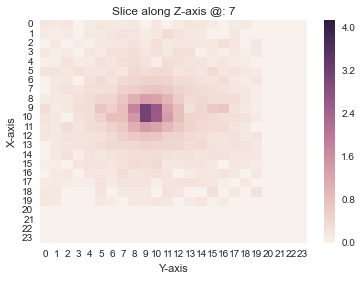

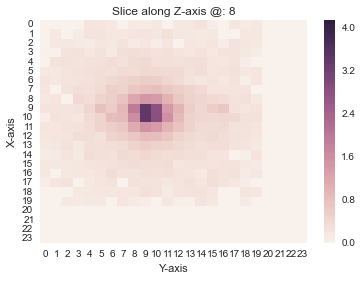

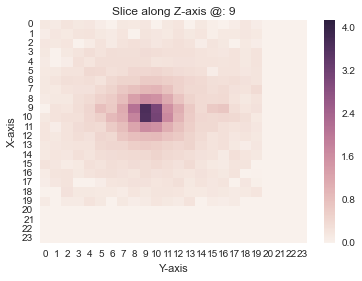

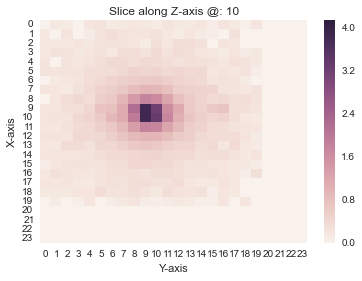

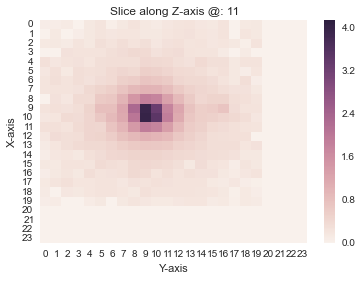

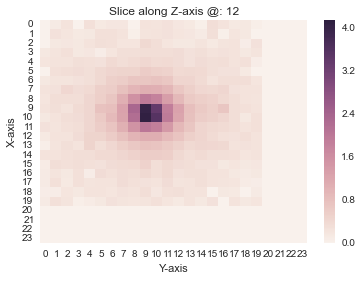

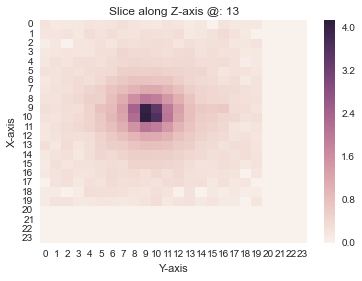

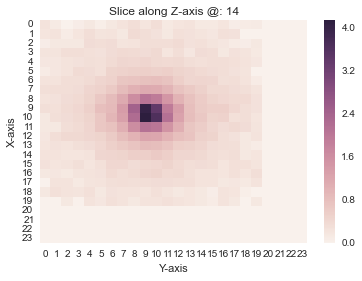

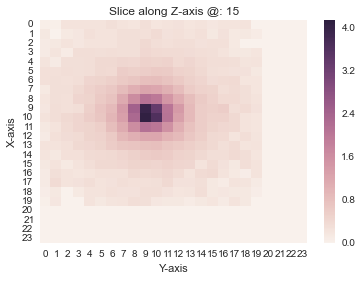

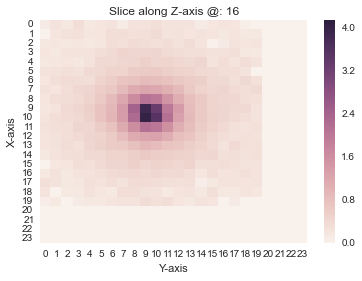

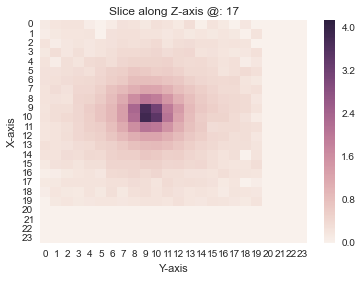

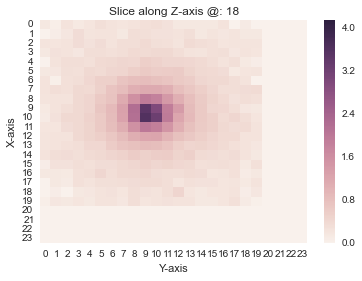

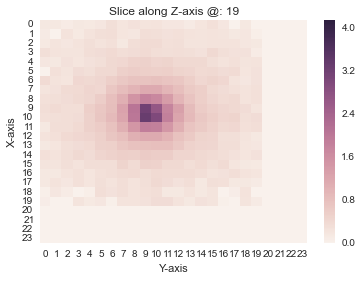

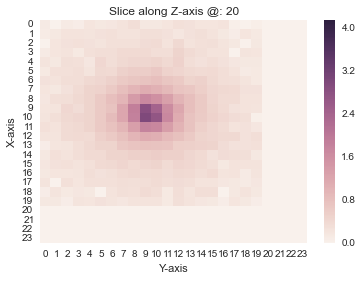

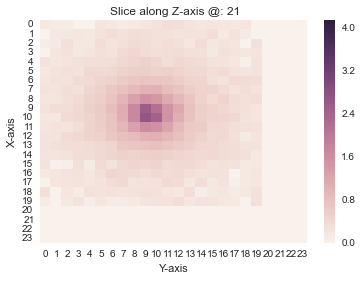

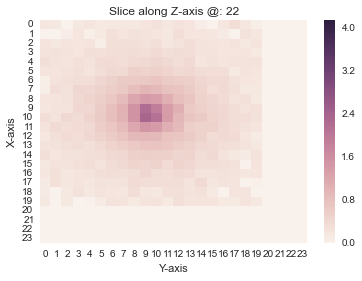

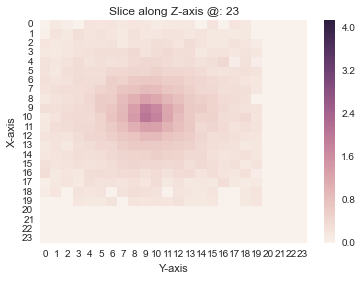

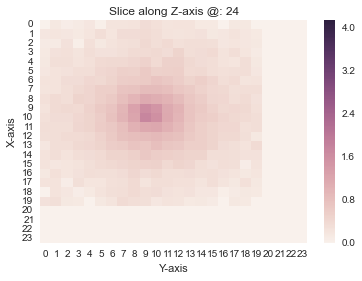

In [9]:
viz_tools.slice_axis_heatmap(ecal_mu,2, scaling_root=3) 

### 3) ```collapse_axis_heatmap```

In [10]:
print viz_tools.collapse_axis_heatmap.__doc__


    plots 2D heatmap, collapsing/averaging the specified axis
    input:
        array: 3D np.array
        axis: axis to collapse
        scaling_root: rescales data=data**1/scaling_root
        binary: plot binarized version of data [if x>1: x=1]
        save: path to save plot
    


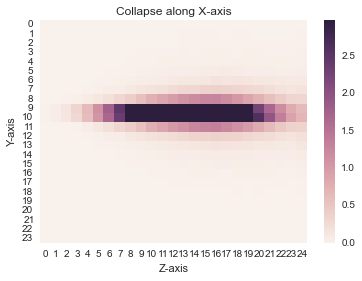

In [11]:
viz_tools.collapse_axis_heatmap(ecal_mu,0) # average along the X-axis

#### we can also try with the ```scaling_root``` option

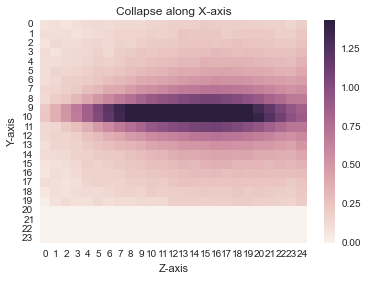

In [12]:
viz_tools.collapse_axis_heatmap(ecal_mu,0,scaling_root=3) # average along the X-axis

### 4) ```hist_by_dim```

In [13]:
print viz_tools.hist_by_dim.__doc__


    plots histogram of average energy along specified axis, averaging along the 2 remaining axes
    input:
        array: 3D np.array
        axis: axis to plot
        save: path to save plot
    


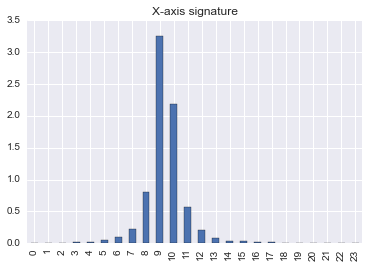

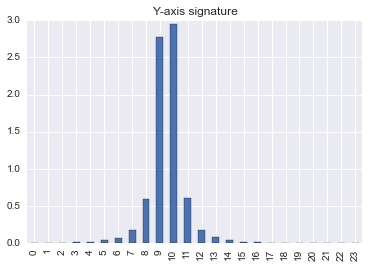

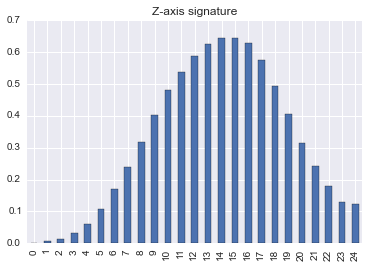

In [14]:
viz_tools.hist_by_dim(ecal_mu,0)
viz_tools.hist_by_dim(ecal_mu,1)
viz_tools.hist_by_dim(ecal_mu,2)